## VM Spec

In [ ]:
!cat /proc/meminfo

In [ ]:
!df -h

In [ ]:
!cat /proc/cpuinfo

In [ ]:
#!sudo apt install build-essential

In [ ]:
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

In [ ]:
#!tar xvf ta-lib-0.4.0-src.tar.gz

In [ ]:
#!wget https://files.pythonhosted.org/packages/90/05/d4c6a778d7a7de0be366bc4a850b4ffaeac2abad927f95fa8ba6f355a082/TA-Lib-0.4.17.tar.gz

In [ ]:
#!tar xvf TA-Lib-0.4.17.tar.gz

## Install ta lib Packages

need to open new terminal
<br>
[Install ta-lib in python 3.7](https://joelzhang.medium.com/install-ta-lib-in-python-3-7-51219acacafb)
<br>[solve permission denied](https://askubuntu.com/questions/279853/permission-denied-error-when-editing-etc-ld-so-conf)

In [ ]:

# url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
# !wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb

# !pip install ta-lib



In [ ]:
# !pip install yfinance
# !pip install fear-greed-index
# !pip install finvizfinance
# !pip install finvizfinance.news
# !pip install finvizfinance.screener.overview
#!pip install mplfinance

# import warnings
# warnings.simplefilter(action='ignore')

     |████████████████████████████████| 64 kB 3.0 MB/s             


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from finvizfinance.quote import finvizfinance
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.0f}'.format
import talib
import yfinance as yf
from datetime import datetime
import os
import time
import pickle
import mplfinance as mpl

from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #KNN
import sklearn.linear_model as sklin #Linear Regression
from sklearn import tree  #Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import model_selection #Grid Search
from sklearn import svm #SVM
from sklearn import naive_bayes #Naive Bayes
from sklearn import ensemble #Ada Boost
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




### NLP DATA

In [ ]:
# Finviz API
stock = finvizfinance('NVDA')

stock_fundament = stock.ticker_fundament()
stock_fundament_df = pd.DataFrame({'Fundamental Param': stock_fundament.keys(), 'Param Values': stock_fundament.values()}).transpose()
stock_description = stock.ticker_description()
outer_ratings_df = stock.ticker_outer_ratings()
# stock_signal_df = stock.ticker_signal()
news_df = stock.ticker_news()
insider_trader_df = stock.ticker_inside_trader()

print(f"stock_description\n{stock_description}\n\nstock_fundament\n{stock_fundament}\n\outer_ratings_df\n{outer_ratings_df}\n\news_df\n{news_df}\ninsider trader:{insider_trader_df}")


# Getting recent financial news from finviz
from finvizfinance.news import News

fnews = News()
all_news = fnews.get_news()
# all_news['news'].head()
# all_news['blogs'].head()
stock.ticker_charts()
# stock.ticker_signal()

IndexError: list index out of range

In [ ]:
all_news['news'].keys()
all_news['news'].head()

,Date,Title,Source,Link
0,03:02PM,Jordan's Capital Bank plans to acquire Societe...,www.reuters.com,https://www.reuters.com/world/middle-east/jord...
1,02:25PM,"Holiday Retail Sales Soared, Mastercard Reports",www.nytimes.com,https://www.nytimes.com/2021/12/26/business/ho...
2,01:46PM,"What is Web3, the new version of the internet?",finance.yahoo.com,https://finance.yahoo.com/news/what-is-web3-ne...
3,01:30PM,"Sen. Blunt: US needs to cap inflation, child t...",www.foxbusiness.com,https://www.foxbusiness.com/politics/sen-blunt...
4,01:01PM,"Meme Madness, 68 New Highs: Superlatives Aboun...",www.bloomberg.com,https://www.bloomberg.com/news/articles/2021-1...


### Stocks Screener

In [ ]:
# Overview

from finvizfinance.screener.overview import Overview
from finvizfinance.screener.financial import Financial
from finvizfinance.screener.technical import Technical


foverview = Overview()
ffinancial = Financial()

filters_dict = {'Index':'S&P 500', 'Country': 'USA'}#, 'Industry':'Auto Manufacturers'}#, 'RSI (14)': 'Overbought (80)', } #'Any' 
# 'RSI (14)': 'Oversold (30)' / 'Not Oversold (>50)'
foverview.set_filter(filters_dict=filters_dict)
ffinancial.set_filter(filters_dict=filters_dict)
df = foverview.screener_view().sort_values(by='Volume', ascending=False)


# Screener Example
# ffinancial = Financial()
# filters_dict = {'RSI (14)': 'Oversold (30)'}
# ffinancial.set_filter(filters_dict=filters_dict)
# df = foverview.ScreenerView().sort_values(by='Volume', ascending=False)

### Data Stocks

In [ ]:
ticker_list = sorted(list(df.Ticker.unique()))

In [ ]:
ticker_list

### Data Importer

In [ ]:

# startdate =  "2020-01-01"
# enddate = datetime.today().strftime('%Y-%m-%d')
# stock_data = yf.download('LCID', start=startdate, end= enddate)
# stock_data.reset_index()

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import time
start = time.time()
frames=[]

#ticker_list = list(df['Ticker'].unique())
#ticker_list = ['NVDA','AAPL']
startdate =  "2012-01-01"
enddate = datetime.today().strftime('%Y-%m-%d')
start = time.time()
print('It took', time.time(), 'seconds.')

def read_data_for_ticker_list(ticker):
  stock_data = yf.download(
        tickers = ticker_list,
        start=startdate,
        end= enddate,
        #period = '1y',
        interval = '1d',
        group_by = 'ticker',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )
  if len(ticker_list)==1:
    stock_data = stock_data.reset_index()
    stock_data['Ticker'] = pd.Series([ticker_list[0] for x in range(len(stock_data.index))])
    stock_data = stock_data[['Ticker','Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    #stock_data.assign(Ticker=ticker_list[0])
    #stock_data.loc[:,'Ticker'] = ticker_list
    #stock_data.head()
  else:
  #stock_data = yf.download(ticker, start=startdate, end= enddate)
  # if len(stock_data)>=250:
  
  #stock_data.insert(loc = 0, column='Ticker', value = t|icker)
  
  
    stock_data = stock_data.stack(level=0).rename_axis(['Date','Ticker'])
    stock_data = stock_data.sort_values(by=['Ticker','Date']).reset_index()
  return stock_data
#stock_data = read_data_for_ticker_list(ticker_list)
#stock_data.reset_index()
print('It took', time.time()-start, 'seconds.')

It took 1641243930.3303318 seconds.
It took 0.0004978179931640625 seconds.


In [ ]:
# def read_data_for_tickerss(ticker):
#   stock_data = yf.download(ticker,threads = True, start=startdate, end= enddate)
#   # if len(stock_data)>=250:
#   stock_data.reset_index()
#   stock_data.insert(loc = 0, column='Ticker', value = ticker)
#   return stock_data

In [ ]:
# def read_data_for_ticker(ticker):
#   stock_data = yf.download(ticker, start=startdate, end= enddate)
#   # if len(stock_data)>=250:
#   stock_data.reset_index()
#   stock_data.insert(loc = 0, column='Ticker', value = ticker)
#   return stock_data

## Feature Engineer

### Calculate Indicators

In [ ]:
def calculate_indicators_for_ticker(stock_data):
  #Overlap Studies Functions


  stock_data['SMA_9'] = talib.SMA(stock_data['Close'], timeperiod=9)
  stock_data['SMA_21'] = talib.SMA(stock_data['Close'], timeperiod=21)
  # stock_data['SMA_20V2'] = stock_data['Close'].rolling(20).mean()

  stock_data['SMA_9_21_diff'] = stock_data['SMA_9'] / stock_data['SMA_21']-1
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']>stock_data['SMA_21'],1,0)
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']<stock_data['SMA_21'],-1,stock_data['SIGNAL_9_21'])

  stock_data['return'] = np.log(stock_data['Close']).diff()
  stock_data['system_return'] = stock_data['SIGNAL_9_21'] * stock_data['return']
  stock_data['entry'] = stock_data['SIGNAL_9_21'].diff()
  stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
  stock_data['SIGNAL_21_50'] = np.where(stock_data['SMA_21']>stock_data['SMA_50'],1,0)
  stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
  stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)
  # stock_data['EMA_200'] = talib.EMA(stock_data['Close'], timeperiod=200)

  # stock_data['MA_30'] = talib.MA(stock_data['Close'], timeperiod=30, matype=0) # MA - Moving average
  # stock_data['MIDPOINT_14'] = talib.MIDPOINT(stock_data['Close'], timeperiod=14) # MIDPOINT - MidPoint over period
  # stock_data['MIDPRICE_14'] = talib.MIDPRICE(stock_data['High'], stock_data['Low'], timeperiod=14) # MIDPRICE - Midpoint Price over period
  # stock_data['TRIMA_30']= talib.TRIMA(stock_data['Close'], timeperiod=30) # TRIMA - Triangular Moving Average
  # stock_data['WMA_30'] = talib.WMA(stock_data['Close'], timeperiod=30) # WMA - Weighted Moving Average
  upper, mid, lower = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
  stock_data['lower_BBANDS_20'] = lower
  stock_data['Mid_BBANDS_20'] = mid
  stock_data['Upper_BBANDS_20'] = upper
  stock_data['BBANDS_Buy Signal'] = np.where(stock_data.Upper_BBANDS_20 > stock_data.Close, True, False)
  stock_data['BBANDS_Sell Signal'] = np.where(stock_data.Upper_BBANDS_20 < stock_data.Close, True, False)

  # stock_data['SAR'] = talib.SAR(stock_data['High'], stock_data['Low'], acceleration=0, maximum=0) # SAR - Parabolic SAR
  # stock_data['TEMA'] = talib.TEMA(stock_data['Close'], timeperiod=30) # TEMA - Triple Exponential Moving Average


  # Momentum Indicator Functions
  stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) #ADX - Average Directional Movement Index
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
  stock_data['MOM'] = talib.MOM(stock_data['Close'], timeperiod=10) #MOM - Momentum
  stock_data['ROC'] = talib.ROC(stock_data['Close'], timeperiod=10) #ROC - Rate of change : ((price/prevPrice)-1)*100
  stock_data['CCI'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # CCI - Commodity Channel Index
  # macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
  # stock_data['MACD'] = macd
  # stock_data['MACDSignal'] = macdsignal
  # stock_data['MACDHist'] = macdhist
  # stock_data['MFI'] = talib.MFI(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], timeperiod=14) #MFI - Money Flow Index
  # stock_data['CMO'] = talib.CMO(stock_data['Close'], timeperiod=14) # Chande Momentum Oscillator
  # stock_data['DX'] = talib.DX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # Directional Movement Index
  # stock_data['BOP'] = talib.BOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # BOP - Balance Of Power
  # stock_data['WILLR'] = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # WILLR - Williams' %R
  # fastk, fastd = talib.STOCHRSI(stock_data['Close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0) # STOCHRSI - Stochastic Relative Strength Index
  # stock_data['STOCHRSI_fastk'] = fastk
  # stock_data['STOCHRSI_fastd'] = fastd
  # slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0) # STOCH - Stochastic
  # stock_data['STOCH_slowk'] = slowk
  # stock_data['STOCH_slowd'] = slowd
  # stock_data['PPO'] = talib.PPO(stock_data['Close'], fastperiod=12, slowperiod=26, matype=0) # PPO - Percentage Price Oscillator
  stock_data['ROC']= talib.ROC(stock_data['Close'], timeperiod=10) # ROC - Rate of change : ((price/prevPrice)-1)*100
  # stock_data['ROCP']= talib.ROCP(stock_data['Close'], timeperiod=10) # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  # stock_data['ROCR']= talib.ROCR(stock_data['Close'], timeperiod=10) # ROCR - Rate of change ratio: (price/prevPrice)


  # Volume Indicator Functions
  # stock_data['AD'] = talib.AD(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume']) # AD - Chaikin A/D Line
  # stock_data['ADOSC'] = talib.ADOSC(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], fastperiod=3, slowperiod=10) # ADOSC - Chaikin A/D Oscillator
  # stock_data['OBV'] = talib.OBV(stock_data['Close'], stock_data['Volume']) # OBV - On Balance Volume


  # Volatility Indicator Functions
  # stock_data['ATR'] = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # ATR - Average True Range
  # stock_data['NATR'] = talib.NATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # NATR - Normalized Average True Range
  # stock_data['TRANGE'] = talib.TRANGE(stock_data['High'], stock_data['Low'], stock_data['Close']) # TRANGE - True Range


  # Cycle Indicator Functions
  # stock_data['HT_DCPERIOD'] = talib.HT_DCPERIOD(stock_data['Close']) # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
  # stock_data['HT_DCPHASE'] = talib.HT_DCPHASE(stock_data['Close']) # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
  # inphase, quadrature = talib.HT_PHASOR(stock_data['Close']) # HT_PHASOR - Hilbert Transform - Phasor Components
  # stock_data['INPHASE'] = inphase
  # stock_data['Quadrature'] = quadrature
  # sine, leadsine = talib.HT_SINE(stock_data['Close']) # HT_SINE - Hilbert Transform - SineWave
  # stock_data['SINE'] = sine
  # stock_data['LeadSine'] = leadsine
  # stock_data['HT_TRENDMODE']= talib.HT_TRENDMODE(stock_data['Close']) # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode


  # Pattern Recognition Functions
  # stock_data['CDL2CROWS'] = talib.CDL2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL2CROWS - Two Crows
  # stock_data['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3BLACKCROWS - Three Black Crows
  # stock_data['CDL3INSIDE'] = talib.CDL3INSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3INSIDE - Three Inside Up/Down
  # stock_data['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3LINESTRIKE - Three-Line Strike
  # stock_data['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3OUTSIDE - Three Outside Up/Down
  # stock_data['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3STARSINSOUTH - Three Stars In The South
  # stock_data['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3WHITESOLDIERS - Three Advancing White Soldiers
  # stock_data['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLABANDONEDBABY - Abandoned Baby
  # stock_data['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLADVANCEBLOCK - Advance Block
  # stock_data['CDLBELTHOLD'] = talib.CDLBELTHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBELTHOLD - Belt-hold
  # stock_data['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBREAKAWAY - Breakaway
  # stock_data['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCLOSINGMARUBOZU - Closing Marubozu
  # stock_data['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCONCEALBABYSWALL - Concealing Baby Swallow
  # stock_data['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCOUNTERATTACK - Counterattack
  # stock_data['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLDARKCLOUDCOVER - Dark Cloud Cover
  # stock_data['CDLDOJI'] = talib.CDLDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJI - Doji
  # stock_data['CDLDOJISTAR'] = talib.CDLDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJISTAR - Doji Star
  # stock_data['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDRAGONFLYDOJI - Dragonfly Doji
  # stock_data['CDLENGULFING'] = talib.CDLENGULFING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLENGULFING - Engulfing Pattern
  # stock_data['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGDOJISTAR - Evening Doji Star
  # stock_data['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGSTAR - Evening Star
  # stock_data['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
  # stock_data['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGRAVESTONEDOJI - Gravestone Doji
  # stock_data['CDLHAMMER'] = talib.CDLHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHAMMER - Hammer
  # stock_data['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHANGINGMAN - Hanging Man
  # stock_data['CDLHARAMI'] = talib.CDLHARAMI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMI - Harami Pattern
  # stock_data['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMICROSS - Harami Cross Pattern
  # stock_data['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIGHWAVE - High-Wave Candle
  # stock_data['CDLHIKKAKE'] = talib.CDLHIKKAKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKE - Hikkake Pattern
  # stock_data['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKEMOD - Modified Hikkake Pattern
  # stock_data['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHOMINGPIGEON - Homing Pigeon
  # stock_data['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLIDENTICAL3CROWS - Identical Three Crows
  # stock_data['CDLINNECK'] = talib.CDLINNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINNECK - In-Neck Pattern
  # stock_data['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINVERTEDHAMMER - Inverted Hammer
  # stock_data['CDLKICKING'] = talib.CDLKICKING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])# CDLKICKING - Kicking
  # stock_data['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
  # stock_data['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLADDERBOTTOM - Ladder Bottom
  # stock_data['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLEGGEDDOJI - Long Legged Doji
  # stock_data['CDLLONGLINE'] = talib.CDLLONGLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLINE - Long Line Candle
  # stock_data['CDLMARUBOZU'] = talib.CDLMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMARUBOZU - Marubozu
  # stock_data['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMATCHINGLOW - Matching Low
  # stock_data['CDLMATHOLD'] = talib.CDLMATHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMATHOLD - Mat Hold
  # stock_data['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGDOJISTAR - Morning Doji Star
  # stock_data['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGSTAR - Morning Star
  # stock_data['CDLONNECK'] = talib.CDLONNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLONNECK - On-Neck Pattern
  # stock_data['CDLPIERCING'] = talib.CDLPIERCING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLPIERCING - Piercing Pattern
  # stock_data['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRICKSHAWMAN - Rickshaw Man
  # stock_data['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRISEFALL3METHODS - Rising/Falling Three Methods
  # stock_data['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSEPARATINGLINES - Separating Lines
  # stock_data['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHOOTINGSTAR - Shooting Star
  # stock_data['CDLSHORTLINE'] = talib.CDLSHORTLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHORTLINE - Short Line Candle
  # stock_data['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSPINNINGTOP - Spinning Top
  # stock_data['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTALLEDPATTERN - Stalled Pattern
  # stock_data['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTICKSANDWICH - Stick Sandwich
  # stock_data['CDLTAKURI'] = talib.CDLTAKURI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
  # stock_data['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTASUKIGAP - Tasuki Gap
  # stock_data['CDLTHRUSTING'] = talib.CDLTHRUSTING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTHRUSTING - Thrusting Pattern
  # stock_data['CDLTRISTAR'] = talib.CDLTRISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTRISTAR - Tristar Pattern
  # stock_data['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUNIQUE3RIVER - Unique 3 River
  # stock_data['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
  # stock_data['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods


  #Statistic Functions
  # stock_data['BETA_5'] = talib.BETA(stock_data['High'], stock_data['Low'], timeperiod=5) # BETA - Beta
  # stock_data['CORREL_30'] = talib.CORREL(stock_data['High'], stock_data['Low'], timeperiod=30) # CORREL - Pearson's Correlation Coefficient (r)
  # stock_data['LINEARREG_14'] = talib.LINEARREG(stock_data['Close'], timeperiod=14) # LINEARREG - Linear Regression
  # stock_data['LINEARREG_ANGLE_14'] = talib.LINEARREG_ANGLE(stock_data['Close'], timeperiod=14) # LINEARREG_ANGLE - Linear Regression Angle
  # stock_data['LINEARREG_INTERCEPT_14'] = talib.LINEARRE_INTERCEPT(stock_data['Close'], timeperiod=14) # LINEARREG_INTERCEPT - Linear Regression Intercept
  # stock_data['LINEARREG_SLOPE_14'] = talib.LINEARREG_SLOPE(stock_data['Close'], timeperiod=14) # LINEARREG_SLOPE - Linear Regression Slope
  # stock_data['STDDEV_5'] = talib.STDDEV(stock_data['Close'], timeperiod=5, nbdev=1) # STDDEV - Standard Deviation
  # stock_data['TSF_14'] = talib.TSF(stock_data['Close'], timeperiod=14) # TSF - Time Series Forecast
  # stock_data['VAR_5'] = talib.VAR(stock_data['Close'], timeperiod=5, nbdev=1) # VAR - Variance


  return stock_data


### Class definition

In [ ]:
from numba import jit

In [ ]:
####### This function with loop has bed performence - change to shift_function ############
# def class_definition(stock_data, returns_pec=0.15, returns_time=7):

#   # col_val = ""
  
#   stock_data.insert(loc = 6,column = 'Target_class',value = "")

#   for i in range(1, len(stock_data)):
#     stock_data['Target_class'][i-returns_time] = stock_data['Close'][i]

#   # convert string to float
#   stock_data['Target_class'] = pd.to_numeric(stock_data['Target_class'],errors='coerce')
  
#   stock_data.insert(loc = 7,column = 'Target_class_pec',value = ((stock_data['Target_class']/ stock_data['Close']) - 1))
#   stock_data.insert(loc = 8,column = 'Target_class_label',value = np.where(stock_data['Target_class_pec'] > returns_pec,1,0))

#   return stock_data

In [ ]:
def class_definition_shift(stock_data, returns_pec=0.15, returns_time=21):

  # col_val = ""
  stock_data.insert(loc = 6,column = 'Target_class',value = "")    
  stock_data['Target_class'] = stock_data['Close'].shift(-returns_time)


  #@jit(nopython=True)
  #for i in range(1, len(stock_data)):
  #  stock_data['Target_class'][i-returns_time] = stock_data['Close'][i]

  # convert string to float
  stock_data['Target_class'] = pd.to_numeric(stock_data['Target_class'],errors='coerce')
  
  stock_data.insert(loc = 7,column = 'Target_class_pec',value = ((stock_data['Target_class']/ stock_data['Close']) - 1))
  stock_data.insert(loc = 8,column = 'Target_class_label',value = np.where(stock_data['Target_class_pec'] > returns_pec,1,0))

  return stock_data

In [ ]:
#!pip install line_profiler
#%load_ext line_profiler

In [ ]:
#%lprun -f ff class_definition(stock_data_with_indicators, 0.2, 21)

### Handling NA and Duplicates

In [ ]:
def handling_na_duplicates(stock_data,verbose=0):
  if verbose==1:    
    print(f"Ticker: {stock_data.Ticker}\ncnt rows before na and dup:{len(stock_data)}")
    stock_data.isna().sum()
    #stock_data.dropna(inplace = True)
    stock_data.drop_duplicates()
    stock_data = stock_data.reset_index(drop=True)
    print(f"cnt rows after na and dup:{len(stock_data)}")
  else:
    #stock_data.dropna(inplace = True)
    stock_data.drop_duplicates()
    stock_data = stock_data.reset_index(drop=True)
  return stock_data


In [ ]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  4


## Store to pickle file

In [ ]:
def pickle_dump(filename,df):
    outfile = open(filename,'wb')
    pickle.dump(df, outfile) #its dumps the object as is
    outfile.close()
    return df

In [ ]:
# pickle_dump(r'stock_data_snp7_6yr',stock_data_cleaned)
pickle_dump(r'stock_data_snp21_10yr_AAPL.pickle',df_stock_data)

,Ticker,Date,Open,High,Low,Close,Target_class,Target_class_pec,Target_class_label,Adj Close,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
0,AAPL,2012-01-03,15,15,15,15,18,0,1,13,302220800,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1,AAPL,2012-01-04,15,15,15,15,18,0,1,13,260022000,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
2,AAPL,2012-01-05,15,15,15,15,18,0,1,13,271269600,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
3,AAPL,2012-01-06,15,15,15,15,18,0,1,13,318292800,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
4,AAPL,2012-01-09,15,15,15,15,18,0,1,13,394024400,NaN,NaN,NaN,0,-0,-0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,AAPL,2021-12-27,177,180,177,180,NaN,NaN,0,180,74919600,175,171,0,1,0,0,0,160,1,171,163,160,171,183,True,False,38,67,1,0,136
2513,AAPL,2021-12-28,180,181,179,179,NaN,NaN,0,179,79144300,175,172,0,1,-0,-0,0,160,1,172,163,161,172,184,True,False,39,65,4,2,127
2514,AAPL,2021-12-29,179,181,178,179,NaN,NaN,0,179,62348900,175,173,0,1,0,0,0,161,1,173,164,162,173,184,True,False,40,65,5,3,98
2515,AAPL,2021-12-30,179,181,178,178,NaN,NaN,0,178,59773000,176,173,0,1,-0,-0,0,162,1,173,164,163,174,184,True,False,40,63,-1,-1,75


In [ ]:
# import processed data from pickle file
def pickle_open(filename):
    
    infile = open(filename,'rb')
    df = pickle.load(infile)
    infile.close
    return df
    

In [ ]:
# df_stock_data = pickle_open('stock_data_snp21_3yr')
# df_stock_data.info()

### Export Data


In [ ]:
# root = '/content/drive/MyDrive/Final Project/'
# stock_data.to_csv(root + "Trading_Algorithem2.csv", sep=',')

## Tickers Engine

### load data from finviz

In [ ]:
ticker_list = ['AAPL']
#ticker_list = list(df.Ticker.unique())
start = time.time()
stock_data = read_data_for_ticker_list(ticker_list)
print('It took', time.time()-start, 'seconds.')



[*********************100%***********************]  1 of 1 completed
It took 0.19710326194763184 seconds.


In [ ]:
stock_data.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
2512,AAPL,2021-12-27,177,180,177,180,180,74919600
2513,AAPL,2021-12-28,180,181,179,179,179,79144300
2514,AAPL,2021-12-29,179,181,178,179,179,62348900
2515,AAPL,2021-12-30,179,181,178,178,178,59773000
2516,AAPL,2021-12-31,178,179,177,178,178,64025500


In [ ]:
stock_data = pickle_open('stock_data_snp21_3yr')
stock_data.info()
# pickle_dump(r'stock_data_snp21_3yr',stock_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16383 non-null  datetime64[ns]
 1   Ticker              16383 non-null  object        
 2   Adj Close           16383 non-null  float64       
 3   Close               16383 non-null  float64       
 4   High                16383 non-null  float64       
 5   Low                 16383 non-null  float64       
 6   Target_class        16383 non-null  float64       
 7   Target_class_pec    16383 non-null  float64       
 8   Target_class_label  16383 non-null  int64         
 9   Open                16383 non-null  float64       
 10  Volume              16383 non-null  float64       
 11  SMA_9               16383 non-null  float64       
 12  SMA_21              16383 non-null  float64       
 13  SMA_9_21_diff       16383 non-null  float64   

In [ ]:
stock_data.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
433,AAPL,2021-12-17,169.93,173.47,169.69,171.14,171.14,195432700
434,AAPL,2021-12-20,168.28,170.58,167.46,169.75,169.75,107499100
435,AAPL,2021-12-21,171.56,173.20,169.12,172.99,172.99,91185900
436,AAPL,2021-12-22,173.04,175.86,172.15,175.64,175.64,92135300
437,AAPL,2021-12-23,175.85,176.85,175.27,176.28,176.28,68227500


### Data preprocessing 

In [ ]:
start = time.time()
stock_data_with_indicators = calculate_indicators_for_ticker(stock_data)
print('It took', time.time()-start, 'seconds.')
stock_data_with_target_class = class_definition_shift(stock_data_with_indicators, 0.15, 30)
print('It took', time.time()-start, 'seconds.')
stock_data_cleaned = handling_na_duplicates(stock_data_with_target_class)
print('It took', time.time()-start, 'seconds.')
df_stock_data = stock_data_cleaned


It took 0.017377853393554688 seconds.
It took 0.021333694458007812 seconds.
It took 0.03284764289855957 seconds.


In [ ]:
stock_data_cleaned.tail(50)

,Ticker,Date,Open,High,Low,Close,Target_class,Target_class_pec,Target_class_label,Adj Close,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
2467,AAPL,2021-10-21,149,150,148,149,162,0,0,149,61421000,145,144,0,1,0,0,0,147,0,145,145,138,144,150,True,False,25,62,6,4,141
2468,AAPL,2021-10-22,150,150,149,149,165,0,0,148,58883400,146,144,0,1,-0,-0,0,147,0,146,145,138,144,150,True,False,24,59,6,4,118
2469,AAPL,2021-10-25,149,149,148,149,171,0,1,148,50720600,147,144,0,1,-0,-0,0,147,0,146,146,138,144,150,True,False,23,59,6,4,85
2470,AAPL,2021-10-26,149,151,149,149,175,0,1,149,60893400,148,144,0,1,0,0,0,147,0,146,146,138,144,151,True,False,22,60,8,6,96
2471,AAPL,2021-10-27,149,150,148,149,175,0,1,149,56094900,148,145,0,1,-0,-0,0,147,0,147,146,138,145,152,True,False,21,59,8,6,68
2472,AAPL,2021-10-28,150,153,150,153,179,0,1,152,100077900,149,145,0,1,0,0,0,147,0,147,146,138,145,153,True,False,22,67,9,6,113
2473,AAPL,2021-10-29,147,150,146,150,176,0,1,150,124850400,149,146,0,1,-0,-0,0,147,0,147,146,138,146,153,True,False,21,58,5,3,39
2474,AAPL,2021-11-01,149,150,148,149,174,0,1,149,74588300,150,146,0,1,-0,-0,0,147,0,148,146,139,146,153,True,False,20,55,2,2,36
2475,AAPL,2021-11-02,149,152,149,150,179,0,1,150,69122000,150,146,0,1,0,0,0,147,0,148,147,140,147,153,True,False,19,58,1,1,74
2476,AAPL,2021-11-03,150,152,150,151,172,0,0,151,54511500,150,147,0,1,0,0,0,147,0,148,147,140,147,154,True,False,19,61,2,1,124


In [ ]:
df_stock_data = stock_data_cleaned.copy()

In [ ]:
df_stock_data.tail()

,Ticker,Date,Open,High,Low,Close,Target_class,Target_class_pec,Target_class_label,Adj Close,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
2433,AAPL,2021-11-11,149,149,148,148,180,0,1,148,41000000,150,149,0,1,-0,-0,0,147,1,149,147,146,149,153,True,False,16,48,-5,-3,-97
2434,AAPL,2021-11-12,148,150,147,150,179,0,1,150,63632600,150,149,0,1,0,0,0,147,1,149,147,147,150,152,True,False,15,55,0,0,-44
2435,AAPL,2021-11-15,150,152,149,150,179,0,1,150,59222800,150,150,0,1,0,0,0,147,1,149,148,147,150,152,True,False,15,55,1,1,27
2436,AAPL,2021-11-16,150,151,149,151,178,0,1,151,59256200,150,150,0,1,0,0,0,147,1,149,148,147,150,152,True,False,15,57,1,1,32
2437,AAPL,2021-11-17,151,155,151,153,178,0,1,153,88807000,150,150,0,1,0,0,0,147,1,150,148,147,150,153,False,True,16,64,2,1,183


## Charts

In [ ]:
# oad from pickle if needed
#df_stock_data = pickle_open('stock_data_snp21_3yr')
#df_stock_data.info()

### EDA CHARTS - Visualization

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


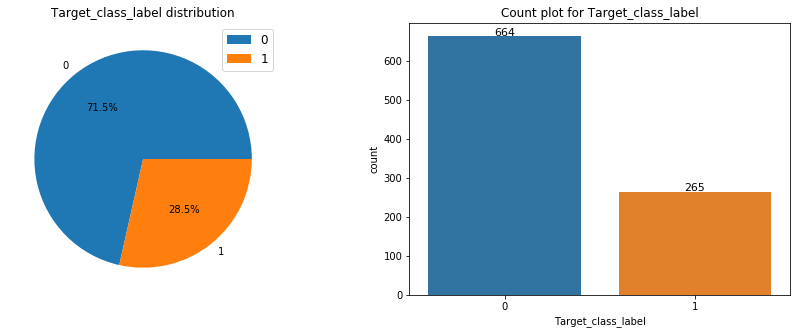

In [ ]:
%time
#!pip install matplotlib==3.1.3

def get_target_split(series,figX=15,figY=7):
    f,ax=plt.subplots(1,2,figsize=(figX,figY))
    series.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
    ax[0].set_title(f'{series.name} distribution')
    ax[0].set_ylabel('')
    sns.countplot(series,ax=ax[1])
    ax[0].legend(fontsize=12)
    
    ax[1].set_title(f'Count plot for {series.name}')
    for rect in ax[1].patches:
        ax[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
get_target_split(df_stock_data['Target_class_label'],15,5)


### Stocks EDA

In [ ]:
stock_data.describe()

,Open,High,Low,Close,Target_class,Target_class_pec,Target_class_label,Adj Close,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,ADX,RSI,MOM,ROC,CCI
count,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00
mean,127.01,128.41,125.51,127.00,133.12,0.05,0.15,126.39,"110,939,115.04",126.27,125.10,0.01,0.37,0.00,0.00,0.00,122.26,0.70,125.19,122.01,117.61,125.20,132.79,26.77,56.41,1.90,1.86,31.70
std,16.53,16.49,16.58,16.56,16.23,0.10,0.36,16.76,"51,484,853.21",16.75,17.18,0.03,0.93,0.02,0.02,0.42,18.61,0.46,17.02,18.45,18.04,17.14,16.84,11.71,11.35,6.84,5.78,105.34
min,83.31,86.42,83.14,83.97,92.61,-0.16,0.00,83.17,"46,397,700.00",83.06,80.59,-0.06,-1.00,-0.08,-0.08,-2.00,74.55,0.00,80.95,74.55,75.25,80.77,86.30,11.29,28.28,-22.05,-16.43,-280.07
25%,117.52,119.02,115.78,116.92,121.15,-0.01,0.00,116.00,"76,264,450.00",117.48,116.27,-0.01,-1.00,-0.01,-0.01,0.00,115.38,0.00,116.59,113.53,108.15,116.32,124.05,17.89,48.00,-2.45,-1.80,-54.67
50%,127.41,128.37,126.00,127.13,130.92,0.05,0.00,126.72,"96,856,700.00",126.47,126.66,0.01,1.00,0.00,0.00,0.00,126.84,1.00,127.20,126.97,119.31,126.78,134.55,22.83,56.07,2.26,1.71,54.35
75%,141.41,142.58,139.15,141.50,145.86,0.11,0.00,141.24,"127,843,750.00",137.87,135.73,0.03,1.00,0.01,0.01,0.00,131.86,1.00,135.02,131.21,128.17,135.96,144.33,33.04,64.75,6.19,5.46,110.81
max,156.98,157.26,154.39,156.69,179.45,0.38,1.00,156.46,"374,336,800.00",153.36,150.73,0.08,1.00,0.10,0.10,2.00,148.35,1.00,151.20,147.34,145.06,150.81,157.53,59.09,81.91,21.06,22.68,272.69


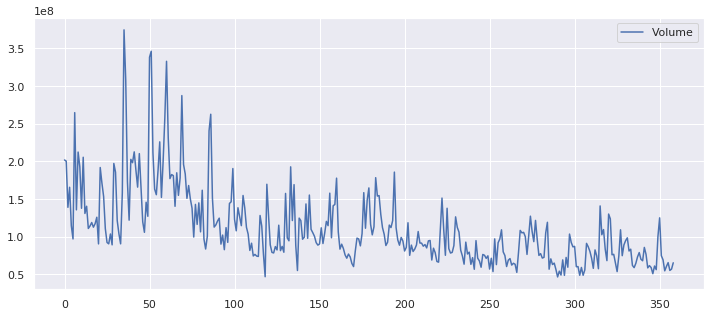

In [ ]:
df_stock_data['Volume'].plot(legend=True,figsize=(12,5))

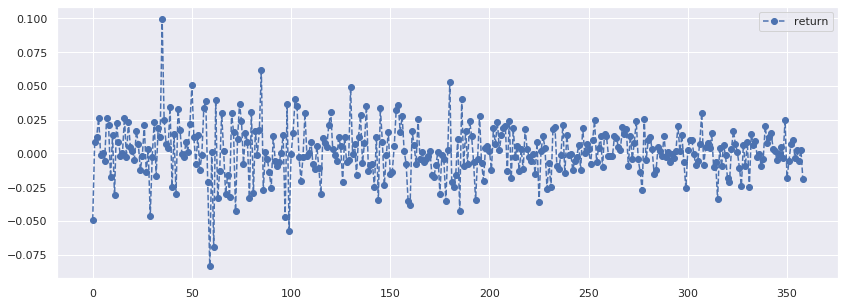

In [ ]:
df_stock_data['return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

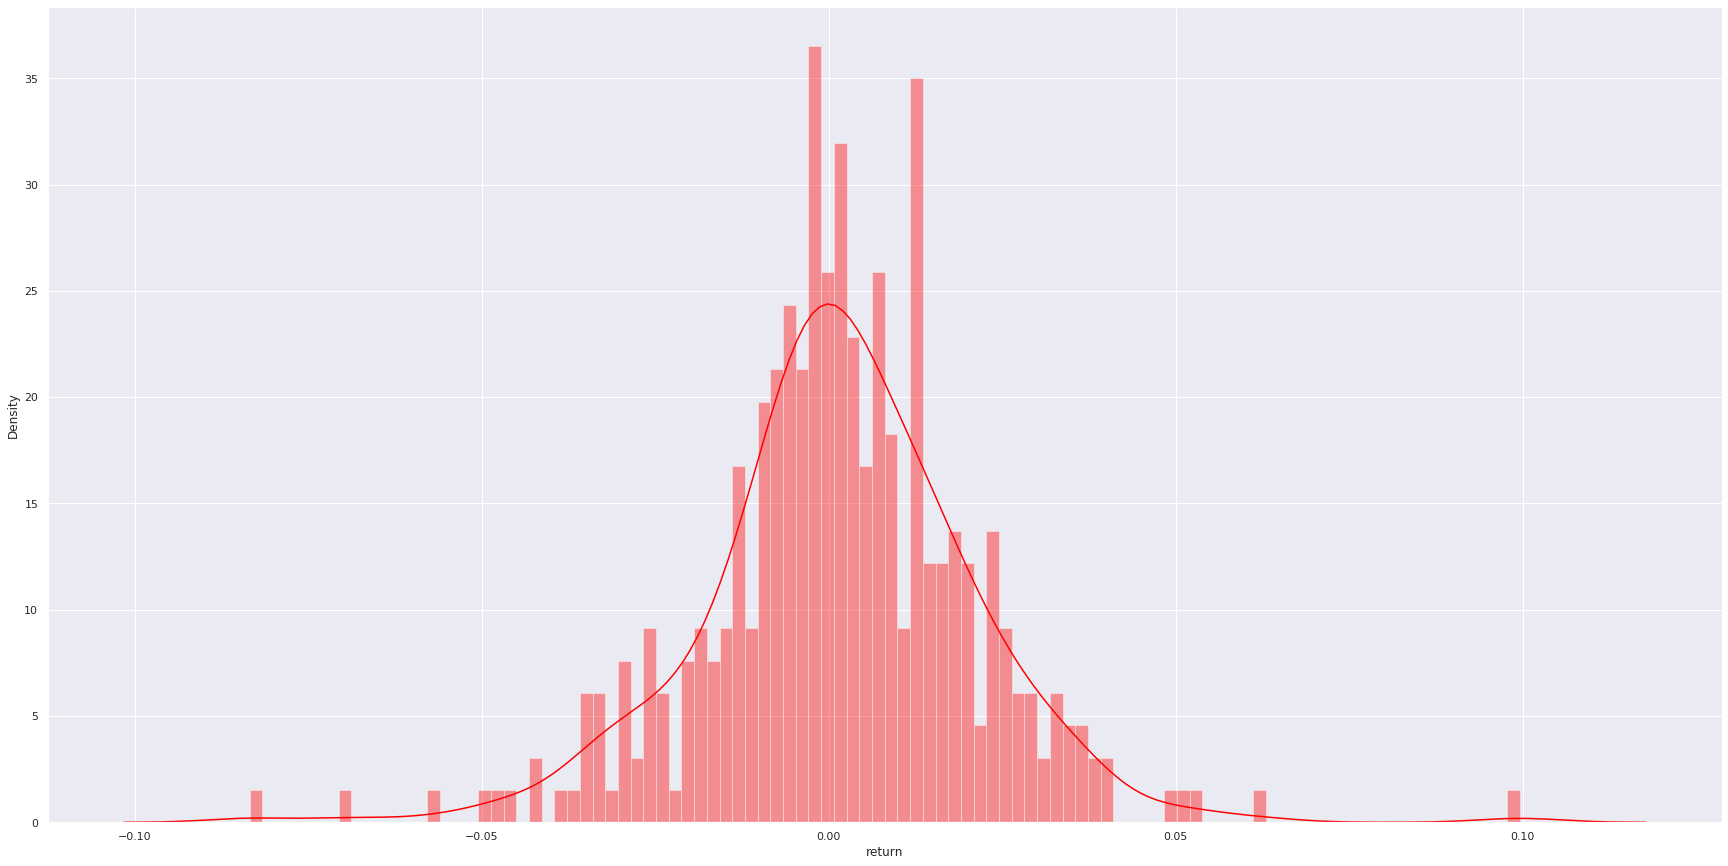

In [ ]:
sns.distplot(df_stock_data['return'].dropna(),bins=100,color='red')

In [ ]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [ ]:
def get_prev_day_info(plot,stock_df):
    previous_close='$' + str("{:,}".format(stock_df['Close'][0])) 
    previous_volume=str("{:,}".format(stock_df['Volume'][0]))
    previous_date=str(stock_df['Date'][0].date())
    plot.set_title(
        
        'Closing price on ' + previous_date + ': ' + 
         previous_close  + '\nShares traded on ' + previous_date +
         ': ' + previous_volume, fontdict=config_title, loc='left'
    )

def get_charts(stock_data):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    
    date = stock_data['Date']
    close = stock_data['Close']
    vol = stock_data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Price')
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=1, color='darkgrey')
    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    #plot_price.yaxis.label.set_ylabel('Volume (in millions)', fontsize=14)
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro', 
    linestyle='-', linewidth=0.5)
    plot_price.set_axisbelow(True)
    format_borders(plot_price)
    format_borders(plot_vol)
    get_prev_day_info(plot_price,stock_data)
    
def format_borders(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.spines['left'].set_color(colors['grey'])
    plot.spines['bottom'].set_color(colors['grey'])

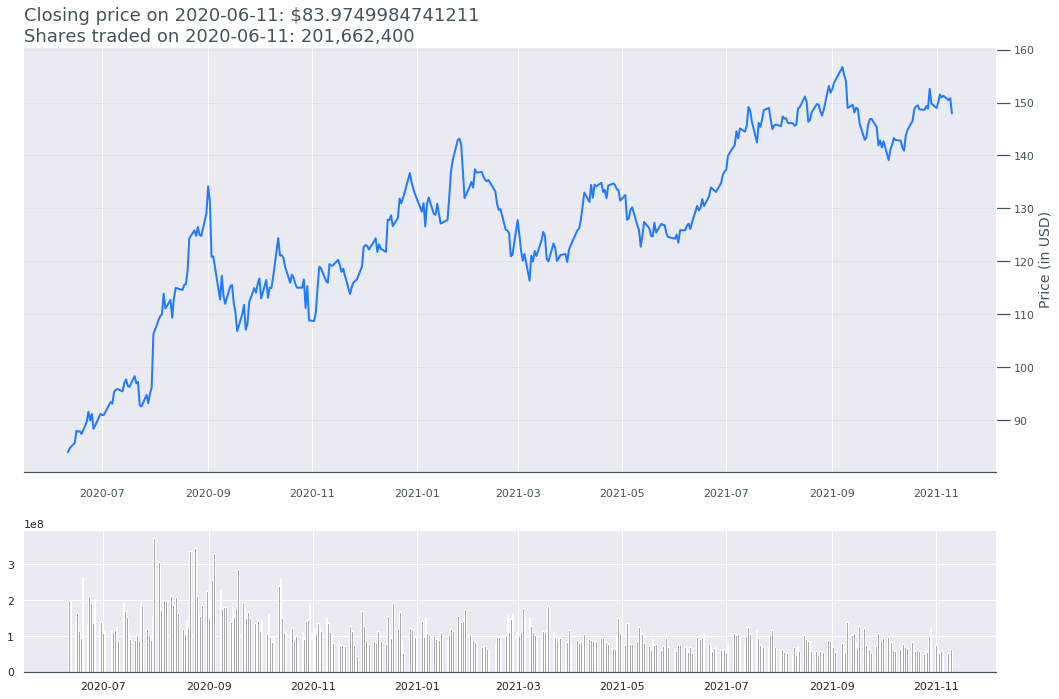

In [ ]:
get_charts(df_stock_data)

### Plot trades on time series

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


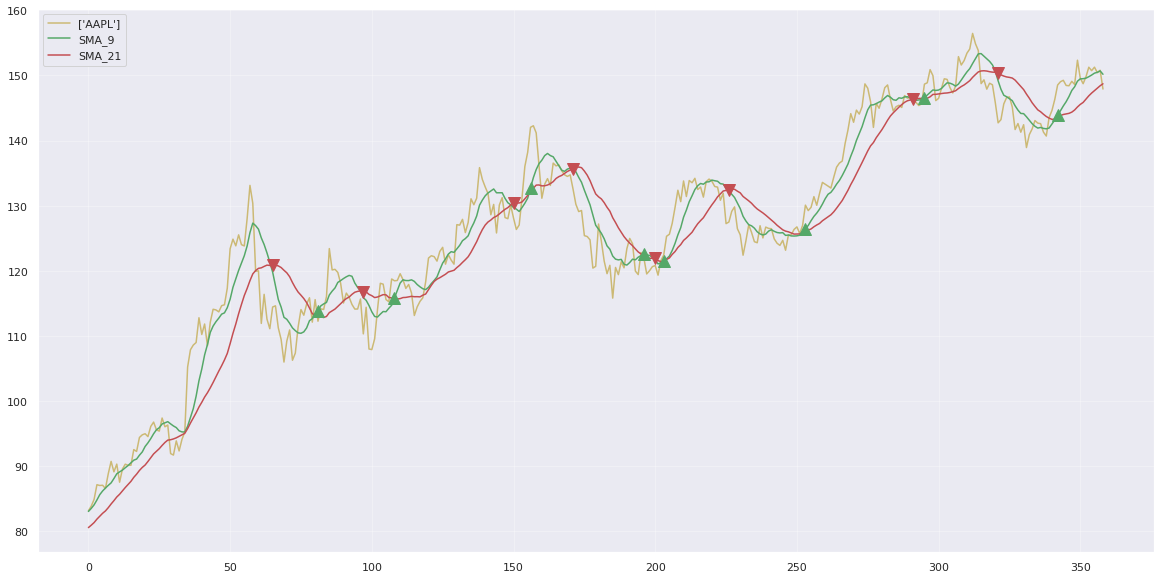

In [ ]:
%time
plt.rcParams['figure.figsize'] = 20,10
plt.grid(True, alpha =.3)
plt.plot(df_stock_data.iloc[-365:]['Adj Close'], color = 'y', label = ticker_list)
plt.plot(df_stock_data.iloc[-365:]['SMA_9'], color = 'g', label = 'SMA_9')
plt.plot(df_stock_data.iloc[-365:]['SMA_21'], color = 'r', label = 'SMA_21')

plt.plot(df_stock_data[-365:].loc[df_stock_data.entry==2].index, df_stock_data[-365:]['SMA_9'][df_stock_data.entry==2], '^', color = 'g', markersize = 12)
plt.plot(df_stock_data[-365:].loc[df_stock_data.entry==-2].index, df_stock_data[-365:]['SMA_21'][df_stock_data.entry==-2], 'v', color = 'r', markersize = 12)

plt.legend(loc=2);

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


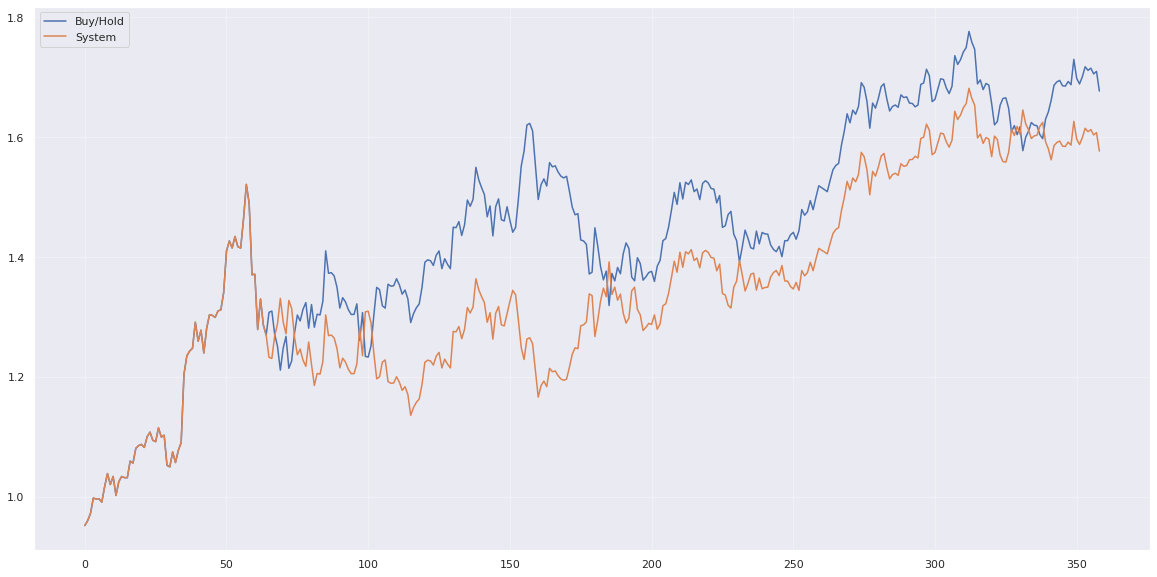

In [ ]:
%time
plt.rcParams['figure.figsize'] = 20,10
plt.plot(np.exp(df_stock_data['return']).cumprod(), label= 'Buy/Hold') # cumprod = acculmative return
plt.plot(np.exp(df_stock_data['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [ ]:
#%time
#np.exp(df_stock_data['return']).cumprod()[-1]-1  need to check with barak

In [ ]:
# np.exp(df_stock_data['system_return']).cumprod()[-1]-1

##Market Charts

###Fear and Greed index

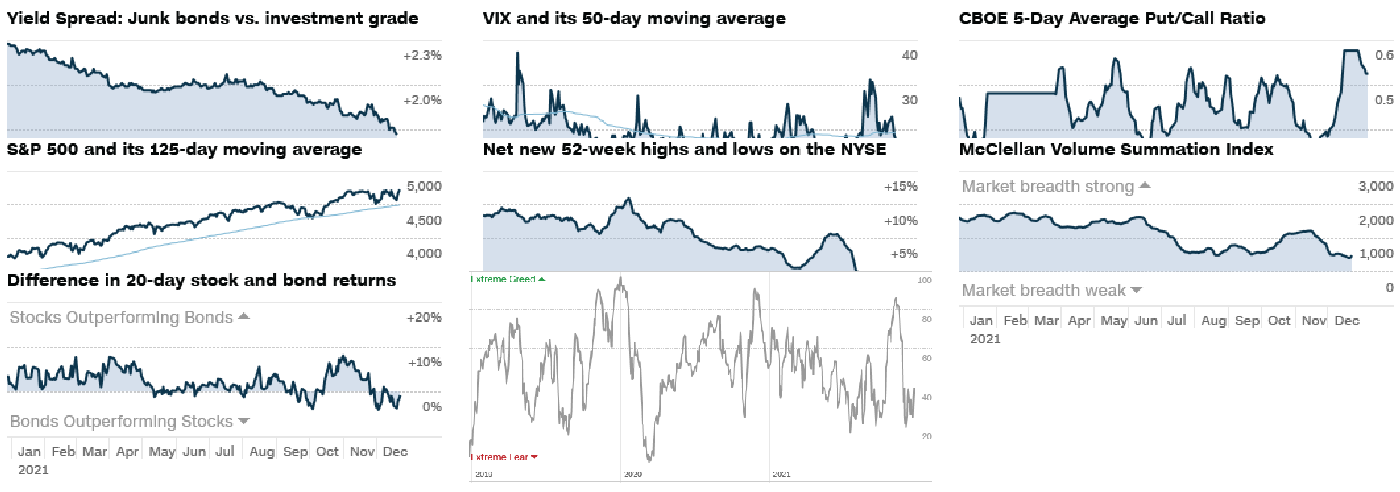

In [ ]:
from fear_greed_index.CNNFearAndGreedIndex import CNNFearAndGreedIndex

cnn_fg = CNNFearAndGreedIndex()

# plot Fear and Greed charts
fig = plt.figure(figsize=(20, 7))
cnn_fg.plot_all_charts(fig)
plt.show()




In [ ]:
print(cnn_fg.get_index())
fear_and_greed_index = int(cnn_fg.get_index()[18:20])

print("####################################")

if fear_and_greed_index <32:
  print("The Market In Fear Sentiment! Search on potential stocks.")
elif fear_and_greed_index >75 :
  print("The Market In Greed Sentiment! Take profit.")
else: 
  print("The Market In Normal Sentiment!")

print("####################################")


Fear & Greed Now: 40 (Fear)
   Previous Close: 35 (Fear)
   1 Week Ago: 31 (Fear)
   1 Month Ago: 64 (Greed)
   1 Year Ago: 57 (Greed)
####################################
The Market In Normal Sentiment!
####################################


#Modeling

###Set Features

In [ ]:
param_to_drop = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Target_class', 'Target_class_pec']
X = df_stock_data.copy()
X = X.drop(columns=param_to_drop)


In [ ]:
# old Corralation
# %%time
# names = X.columns
# correlations = X.corr()

# # plot correlation matrix
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(names),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names, rotation = 90)
# ax.set_yticklabels(names)
# plt.show()

Text(0.5, 1, 'Diagonal Correlation HeatMap')

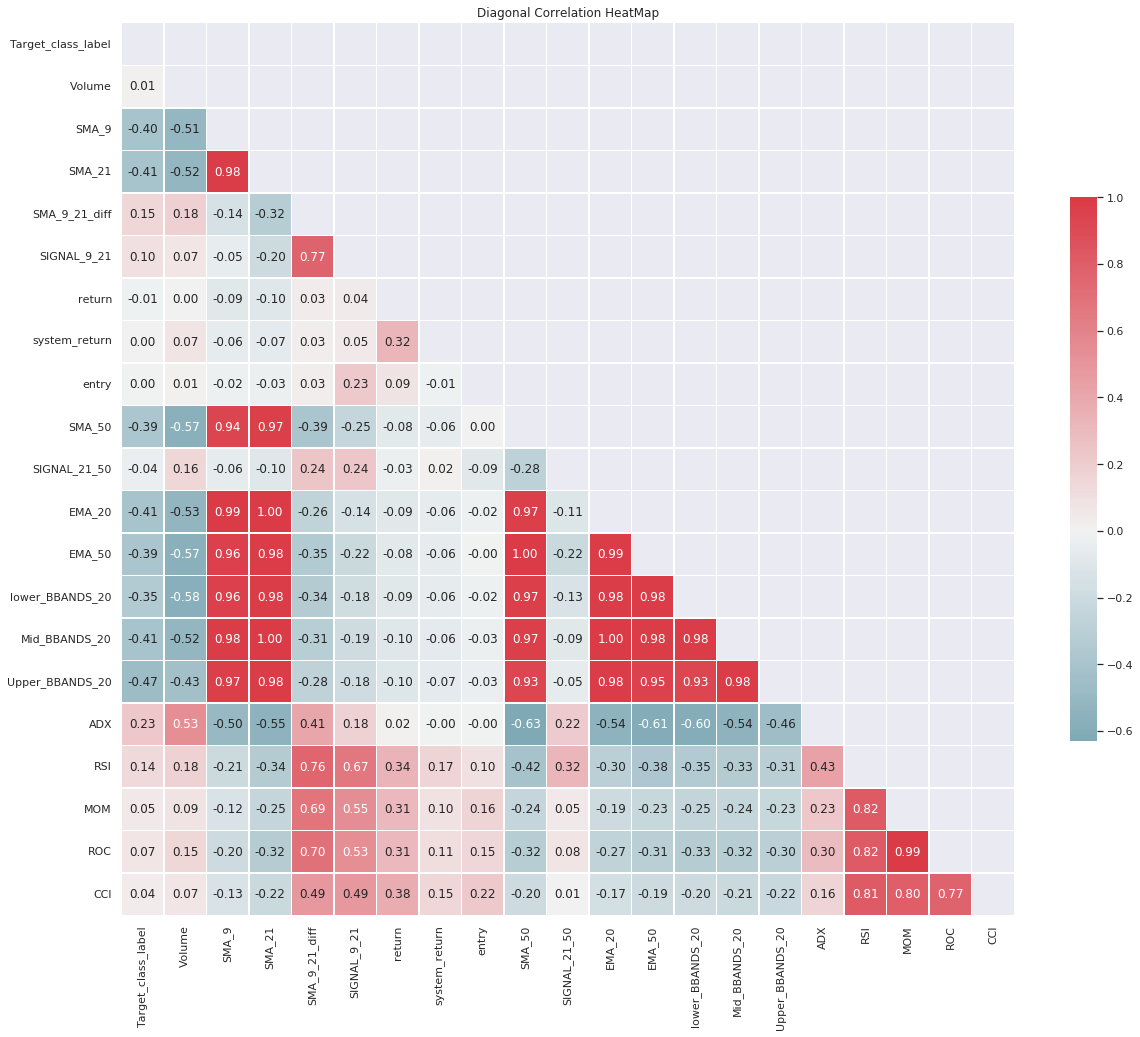

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
corr = X.select_dtypes(exclude=["object","bool"]).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap")

In [ ]:
# corr = corr.style.format({'Target_class_label': "{:.2f}"})

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
abs(corr['Target_class_label']).sort_values(ascending=False)


Target_class_label   1.000
Upper_BBANDS_20      0.465
SMA_21               0.411
Mid_BBANDS_20        0.411
EMA_20               0.408
SMA_9                0.401
EMA_50               0.394
SMA_50               0.387
lower_BBANDS_20      0.346
ADX                  0.234
SMA_9_21_diff        0.152
RSI                  0.140
SIGNAL_9_21          0.096
ROC                  0.067
MOM                  0.050
CCI                  0.038
SIGNAL_21_50         0.038
Volume               0.011
return               0.007
system_return        0.002
entry                0.000
Name: Target_class_label, dtype: float64

In [ ]:
#df_stock_data = stock_data_cleaned    

#### correlation plot after droping non relevent features

In [ ]:
#%time
 # Target,

param_to_drop = ['Target_class_label','entry','system_return','SMA_50','EMA_50','EMA_20','SMA_9','Mid_BBANDS_20','ROC','Upper_BBANDS_20','lower_BBANDS_20','RSI'] # Target
X = X.drop(columns=param_to_drop)
y = df_stock_data['Target_class_label']

Text(0.5, 1, 'Diagonal Correlation HeatMap')

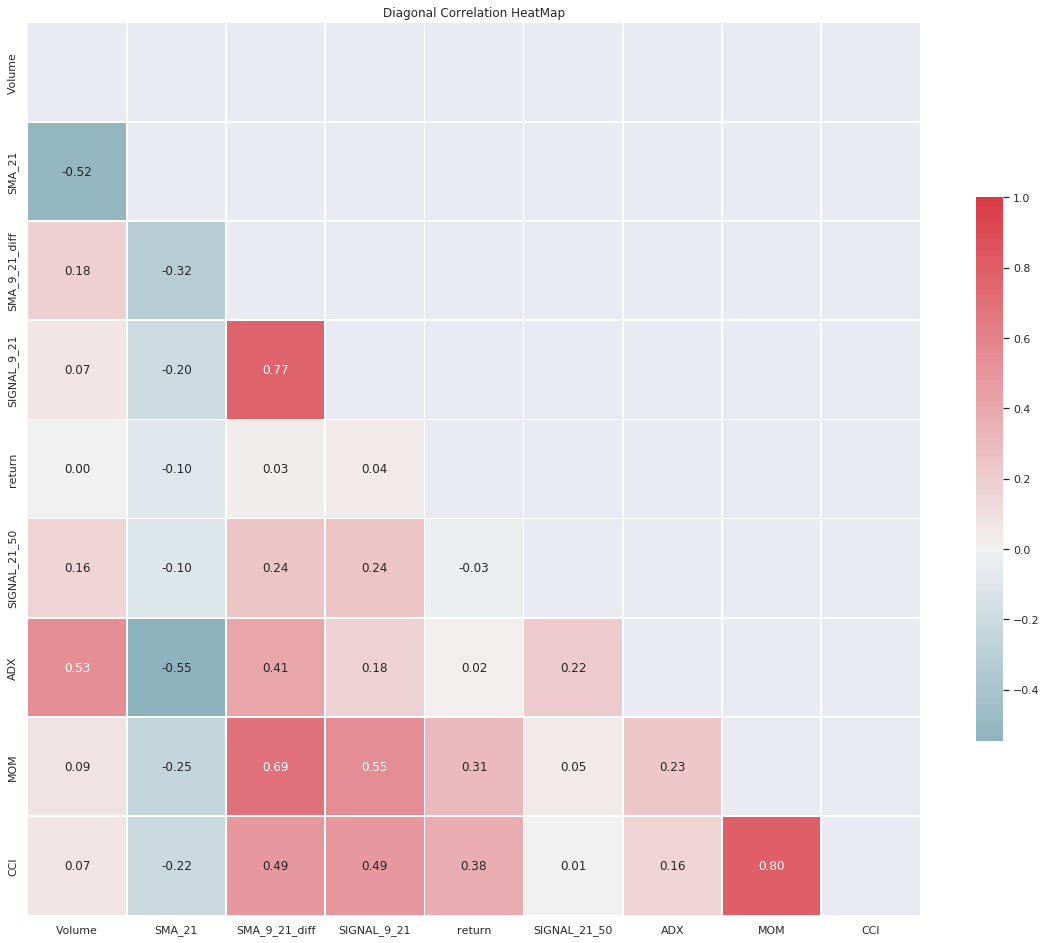

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
corr = X.select_dtypes(exclude=["object","bool"]).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap")

In [ ]:
X.head()

,Volume,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,SIGNAL_21_50,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,MOM,CCI
0,201662400,80.587,0.031,1,-0.049,1,True,False,56.627,4.412,110.949
1,200146000,80.958,0.032,1,0.009,1,True,False,55.609,5.215,88.224
2,138808800,81.356,0.033,1,0.012,1,True,False,54.375,5.285,75.136
3,165428800,81.884,0.036,1,0.026,1,True,False,53.771,7.185,118.594
4,114406400,82.320,0.040,1,-0.001,1,True,False,53.354,6.618,114.526


###Set train/ test

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88, stratify = y)

CPU times: user 5.21 ms, sys: 57 µs, total: 5.27 ms
Wall time: 3.92 ms


###Normalize and Standartization:

In [ ]:
#%time
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)


### Correlation Checking

### Feature Selection

In [ ]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
X_train.head(10)

,Volume,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,SIGNAL_21_50,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,MOM,CCI
0,0.01,-0.66,0.78,0.68,-0.28,-1.53,0.32,-0.32,-0.61,0.31,0.43
1,-0.96,1.11,0.45,0.68,0.14,-1.53,0.32,-0.32,-0.39,0.88,0.60
2,-0.33,-0.26,0.61,0.68,0.26,0.65,0.32,-0.32,-0.74,0.58,1.45
3,-0.04,0.36,0.05,0.68,-0.85,0.65,0.32,-0.32,-0.10,-0.67,-1.85
4,-0.56,1.43,0.13,0.68,0.68,0.65,-3.17,3.17,-0.63,0.76,1.09
5,0.08,0.34,-1.74,-1.47,2.54,-1.53,0.32,-0.32,-0.04,-1.39,-0.76
6,-0.33,0.05,1.29,0.68,0.17,0.65,0.32,-0.32,-0.05,1.05,0.49
7,-0.92,0.27,0.63,0.68,0.15,0.65,0.32,-0.32,-0.38,0.74,0.98
8,1.22,-0.30,0.62,0.68,1.87,0.65,0.32,-0.32,1.66,-1.38,-1.29
9,-0.13,0.20,0.42,0.68,0.34,0.65,0.32,-0.32,-0.69,-0.11,-0.22


In [ ]:
#!pip install xgboost

[01:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature Importances :  [0.08954783 0.34947395 0.11565102 0.         0.02711708 0.11561911
 0.         0.         0.12435895 0.08265633 0.09557576]


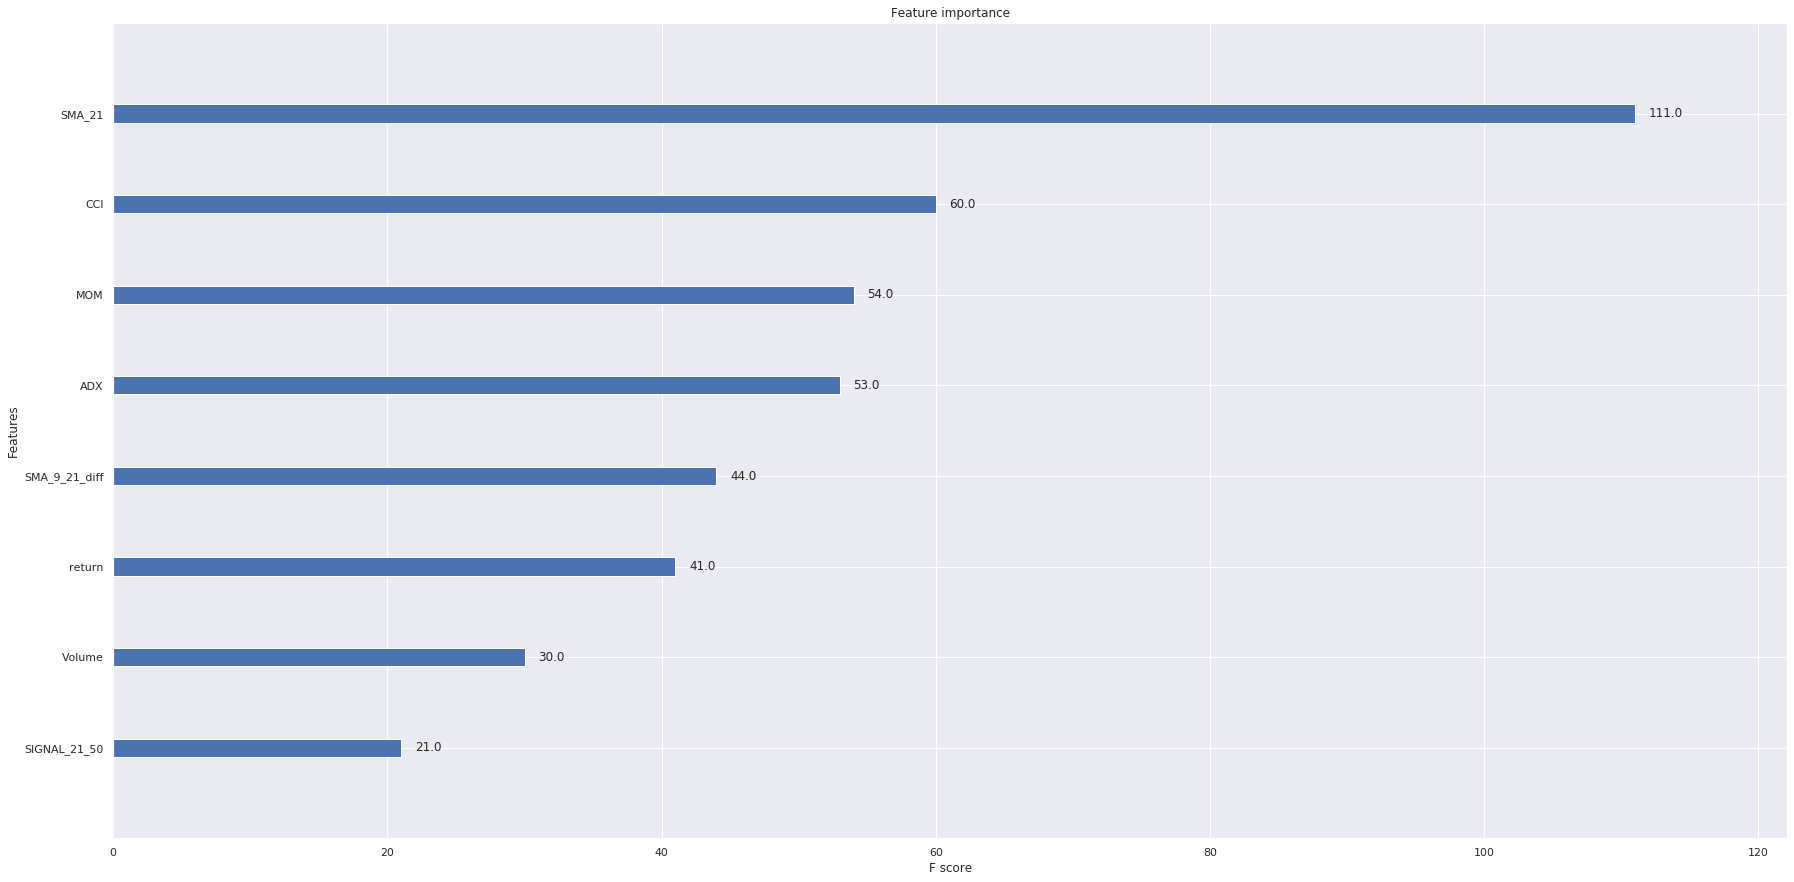

CPU times: user 1.8 s, sys: 6.66 ms, total: 1.8 s
Wall time: 1.04 s


In [ ]:
%%time
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0,max_depth=5 )
xgb_model.fit(X_train, y_train)


print("Feature Importances : ", xgb_model.feature_importances_)
# importances_xgb = xgb_model.feature_importances_

# plot feature importance
sns.set(rc={'figure.figsize':(30,15)})
plot_importance(xgb_model)
plt.show()


### How can we attempt to predict future stock behaviour?
Monte Carlo Method
[Stock Market Analysis for Tech Stocks](https://sajalsharma.com/portfolio/tech_stock_analysis)
<br>
[Monte carlo](https://www.investopedia.com/articles/07/montecarlo.asp)

In [ ]:
days = 365

#delta t
dt = 1/365

mu = X['return'].mean()

sigma = X['return'].std()

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [ ]:
df_stock_data.head()

,Ticker,Date,Open,High,Low,Close,Target_class,Target_class_pec,Target_class_label,Adj Close,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
0,AAPL,2020-06-11,87.33,87.76,83.87,83.97,92.61,0.10,0,83.17,201662400,83.06,80.59,0.03,1,-0.05,-0.05,0.00,74.55,1,80.95,74.55,75.25,80.77,86.30,True,False,56.63,63.98,4.41,5.55,110.95
1,AAPL,2020-06-12,86.18,86.95,83.56,84.70,94.81,0.12,0,83.88,200146000,83.54,80.96,0.03,1,0.01,0.01,0.00,75.04,1,81.31,74.95,75.59,81.14,86.69,True,False,55.61,65.44,5.21,6.56,88.22
2,AAPL,2020-06-15,83.31,86.42,83.14,85.75,93.25,0.09,0,84.92,138808800,84.08,81.36,0.03,1,0.01,0.01,0.00,75.53,1,81.73,75.37,76.03,81.58,87.12,True,False,54.38,67.49,5.28,6.57,75.14
3,AAPL,2020-06-16,87.86,88.30,86.18,88.02,95.04,0.08,0,87.17,165428800,84.83,81.88,0.04,1,0.03,0.03,0.00,76.08,1,82.33,75.87,76.00,82.04,88.09,True,False,53.77,71.45,7.18,8.89,118.59
4,AAPL,2020-06-17,88.79,88.85,87.77,87.90,96.19,0.09,0,87.05,114406400,85.64,82.32,0.04,1,-0.00,-0.00,0.00,76.53,1,82.86,76.34,76.22,82.52,88.82,True,False,53.35,70.95,6.62,8.14,114.53


Text(0.5, 1.0, 'Monte Carlo Analysis for AAPL')

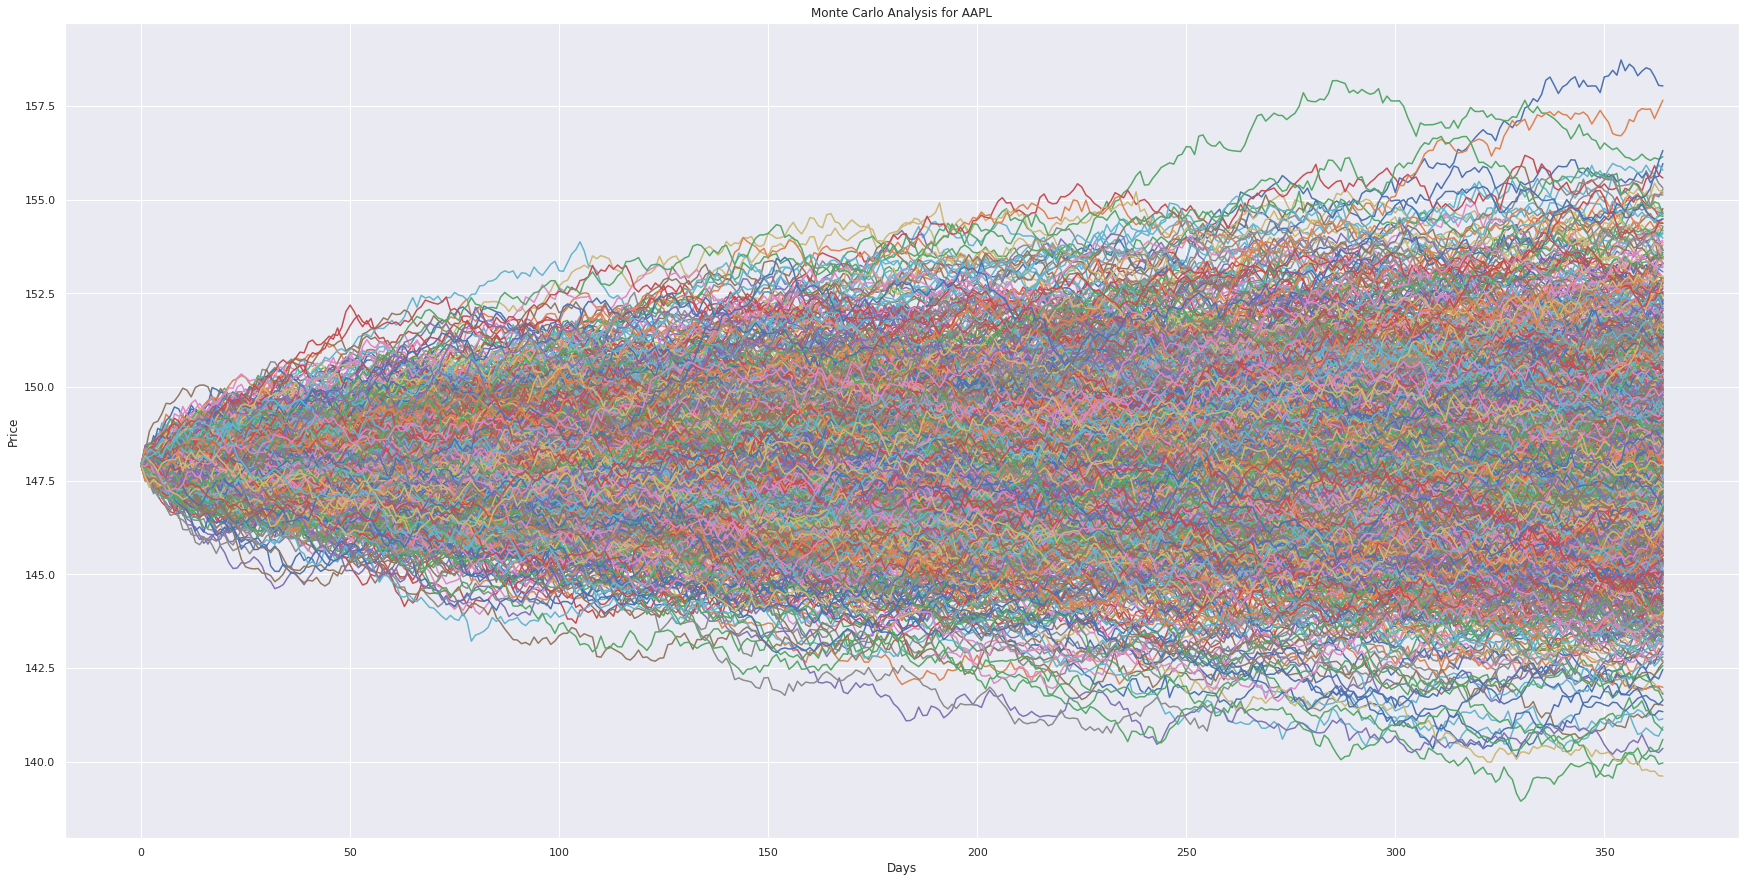

In [ ]:
start_price = df_stock_data[df_stock_data['Date']==max(df_stock_data['Date'])]['Close'].max() #Taken from above

for run in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for '+ticker_list[0])

In [ ]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for AAPL Stock after 365 days')

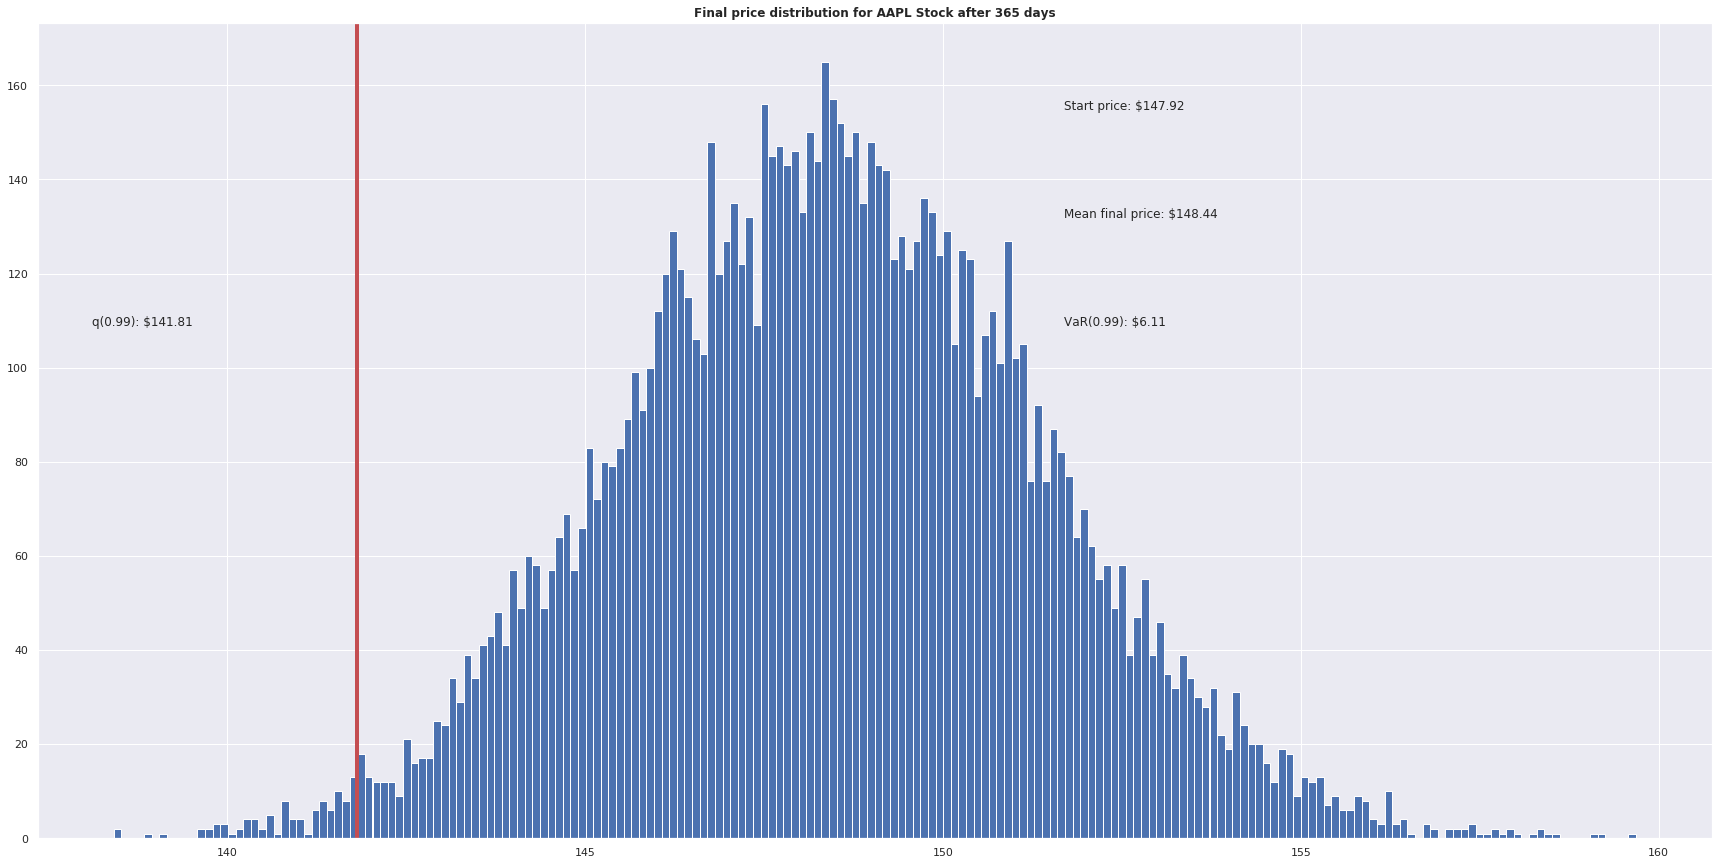

In [ ]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for "+ticker_list[0]+" Stock after %s days" %days, weight='bold')

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier #Random Forest

forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

CPU times: user 1.43 s, sys: 246 ms, total: 1.68 s
Wall time: 1.18 s


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

                    Importance
SMA_21                   37.71
ADX                      18.64
SMA_9_21_diff            10.17
Volume                    8.18
MOM                       7.73
CCI                       7.29
return                    5.23
SIGNAL_21_50              3.78
SIGNAL_9_21               1.04
BBANDS_Sell Signal        0.17
BBANDS_Buy Signal         0.07
CPU times: user 126 ms, sys: 4.85 ms, total: 131 ms
Wall time: 137 ms


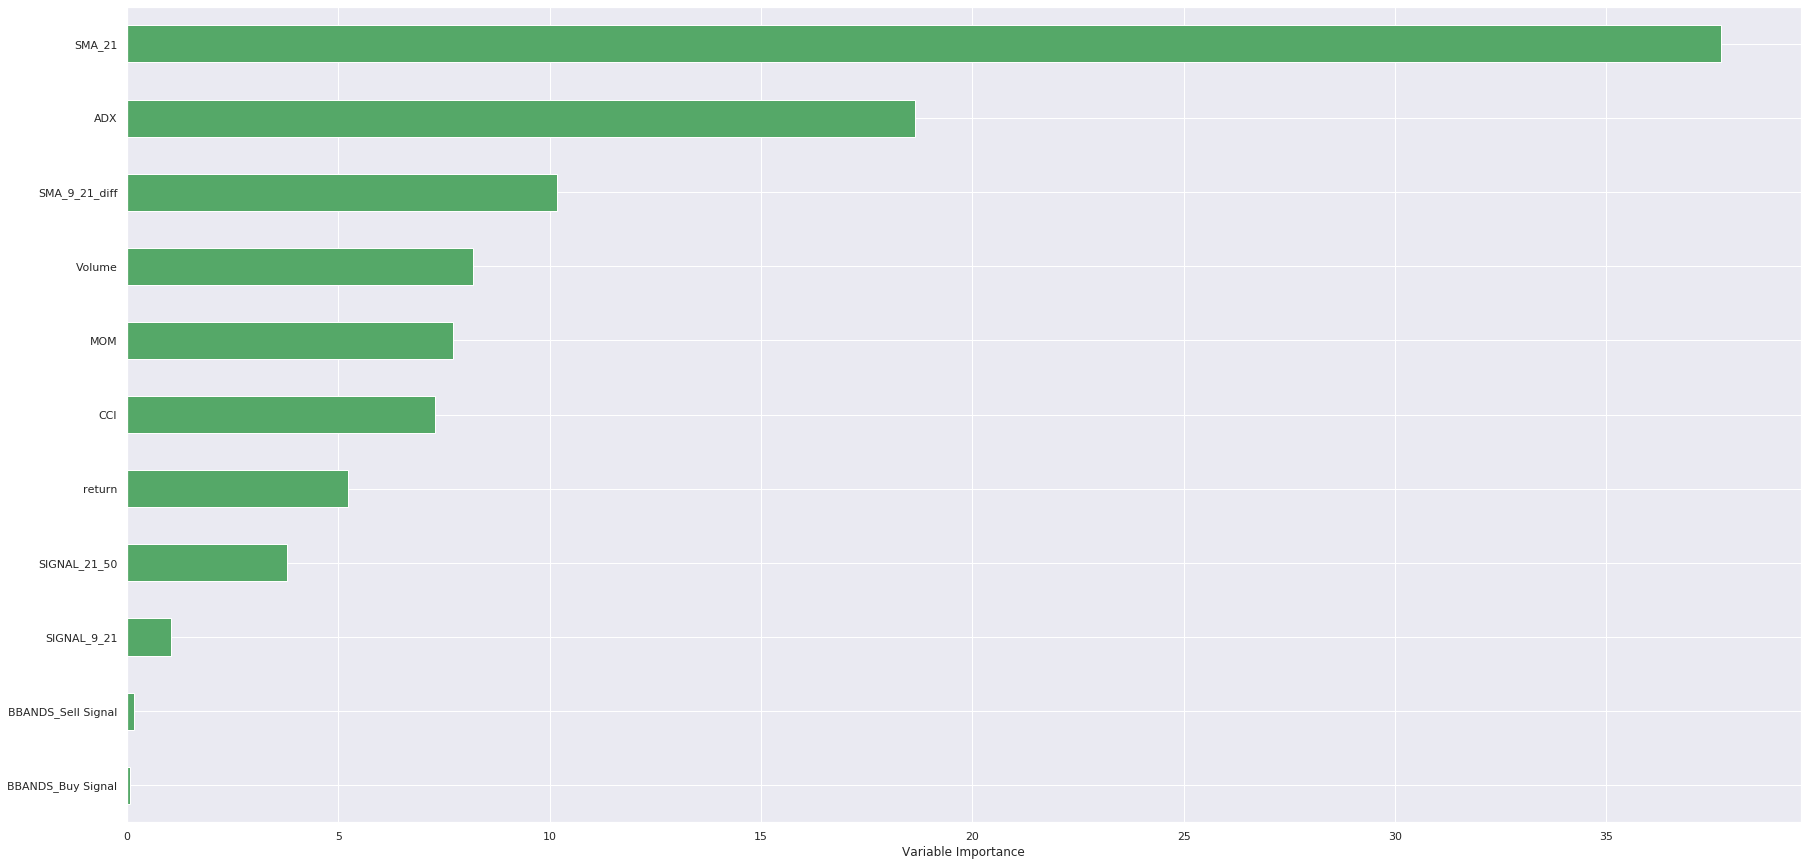

In [ ]:
%%time
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
Importance = Importance.nlargest(40,'Importance')
print(Importance.sort_values('Importance', axis=0, ascending=False))

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )
sns.set(rc={'figure.figsize':(30,15)})
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
%%time
# saved optimal features as dataframe
col_list= pd.DataFrame(Importance).transpose().columns
col_list
x=X[col_list]
x

CPU times: user 1.81 ms, sys: 0 ns, total: 1.81 ms
Wall time: 1.67 ms


,SMA_21,ADX,SMA_9_21_diff,Volume,MOM,CCI,return,SIGNAL_21_50,SIGNAL_9_21,BBANDS_Sell Signal,BBANDS_Buy Signal
0,80.59,56.63,0.03,201662400,4.41,110.95,-0.05,1,1,False,True
1,80.96,55.61,0.03,200146000,5.21,88.22,0.01,1,1,False,True
2,81.36,54.38,0.03,138808800,5.28,75.14,0.01,1,1,False,True
3,81.88,53.77,0.04,165428800,7.18,118.59,0.03,1,1,False,True
4,82.32,53.35,0.04,114406400,6.62,114.53,-0.00,1,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
354,147.30,19.16,0.02,60394600,1.48,125.90,-0.00,0,1,False,True
355,147.68,18.87,0.02,65414600,2.59,98.00,0.00,1,1,False,True
356,148.04,18.60,0.02,55020900,1.80,56.60,-0.01,1,1,False,True
357,148.42,18.29,0.02,56787900,1.49,51.06,0.00,1,1,False,True


### Select Best Model

In [ ]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
data_Selected

# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.930172 (0.052081)
CART: 0.930542 (0.054073)
SVM: 0.920074 (0.037892)
RF: 0.930542 (0.046460)
NB: 0.700493 (0.229849)


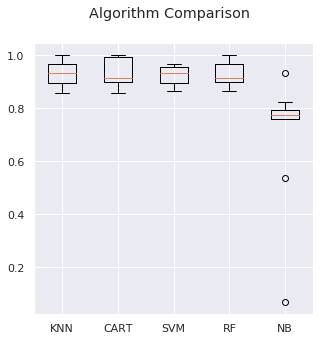

In [ ]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train, y_train)

In [ ]:
pred_rf= rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

0.9583333333333334
[[61  0]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.73      0.84        11

    accuracy                           0.96        72
   macro avg       0.98      0.86      0.91        72
weighted avg       0.96      0.96      0.96        72



[Clustering](https://quantdare.com/reproducing-the-sp500-by-clustering/)

### Prediction


In [ ]:
# list_col = X.columns
# # df_stock_data.head()
# data=df_stock_data[df_stock_data['Ticker']=='TSLA'][list_col]
# data
# # predict()

In [ ]:
Overview_data = pickle_open('Finviz3yr_Overview')
Overview_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16419 entries, 0 to 16418
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16419 non-null  datetime64[ns]
 1   Ticker     16419 non-null  object        
 2   Adj Close  16419 non-null  float64       
 3   Close      16419 non-null  float64       
 4   High       16419 non-null  float64       
 5   Low        16419 non-null  float64       
 6   Open       16419 non-null  float64       
 7   Volume     16419 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.0+ MB


In [ ]:
#Overview_data.head()
Overview_data_last_day = Overview_data[Overview_data['Date'].max()== Overview_data['Date']]
Overview_data_last_day.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
33,2021-12-17,AAL,16.95,16.95,17.30,16.40,16.66,"41,330,600.00"
67,2021-12-17,AAP,232.82,232.82,237.92,231.76,237.92,"1,544,500.00"
101,2021-12-17,AAPL,171.14,171.14,173.47,169.69,169.93,"195,432,700.00"
135,2021-12-17,ABBV,129.53,129.53,131.02,129.37,130.84,"12,612,800.00"
169,2021-12-17,ABC,125.18,125.18,126.36,123.61,124.66,"1,434,700.00"


# tasks & review

In [ ]:
#Tasks
# 1. in case we want live prediction
# load all s&p (DTD) current live indicator > create adjust row per stock (Date	Ticker	Adj Close	Close	High	Low	Open	Volume)
# build up to 50 days back  due to the longest history parameter (stock_data['EMA_50']) > we should pickle it each morning
# 2. in case of premarket prediction. we should predict by the last day

# predict
#we need  pickle the best model (currently the SVM)
#we need the last day for each 

# need to drop columns from the corraltion
# need to drop column from the importance
# compare corralation vs importance


# need to create 2 sets of imporance freature and find the top of two of them (interscate) חיתוך

![image.png](attachment:64f9a7cd-fb2a-4126-8e96-4ef9c1b77177.png)

![image.png](attachment:9aeb95e1-ab89-48cd-a31e-2f84c071fab8.png)

6yr 21 days  20%

![image.png](attachment:f992d421-d392-460b-b10d-9585626c98a6.png)

In [ ]:
# 6yr run  random forest  feature importance


![image.png](attachment:17886246-5197-432f-a347-9905f8e52e31.png)

![image.png](attachment:7bdfeeb4-6045-4291-83c6-1d64ad0444b4.png)

Drop columns ( still receive them in the project)

![image.png](attachment:a39e5221-0b74-4f81-98e2-ae0a1250e8a9.png)